In [1]:
from models import KMeans
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import train_test_split, evaluate, plot_silhouette_scores, PlotType, plot
from typing import get_args
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load data

In [2]:
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [4]:
from models import preprocessing

X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)
X

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,0.264264,0.435115,0.552288,0.479167,0.560000,0.512821,0.422151,0.250000,0.009671,0.338308,0.462366,0.056818,0.512821
1,0.489489,0.351145,0.189542,0.645833,0.733333,0.820513,0.552587,0.338235,0.062863,0.721393,0.149462,0.597885,0.820513
2,0.339339,0.511450,0.810458,0.614583,0.413333,0.863248,0.493265,0.338235,0.062863,0.736318,0.139247,0.597885,0.863248
3,0.321321,0.297710,0.413399,0.666667,0.506667,0.717949,0.552587,0.397059,0.031915,0.716418,0.136559,0.597885,0.717949
4,0.660661,0.534351,0.362745,0.656250,0.266667,0.649573,0.895666,0.264706,0.053191,0.796020,0.124731,0.597885,0.649573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.903904,0.595420,0.655229,1.000000,0.413333,0.162393,0.529695,0.426471,0.433269,0.298507,0.587097,0.715909,0.162393
879,0.642643,0.465649,0.431373,0.250000,0.360000,0.000000,0.263242,0.411765,0.778530,0.179104,0.423118,0.386364,0.000000
880,0.678679,0.480916,0.241830,0.645833,0.560000,0.333333,0.481541,0.514706,0.324952,0.268657,0.342473,0.295455,0.333333
881,0.810811,0.832061,0.276144,0.395833,0.600000,0.829060,0.384430,0.750000,0.422631,0.462687,0.706452,0.534091,0.829060


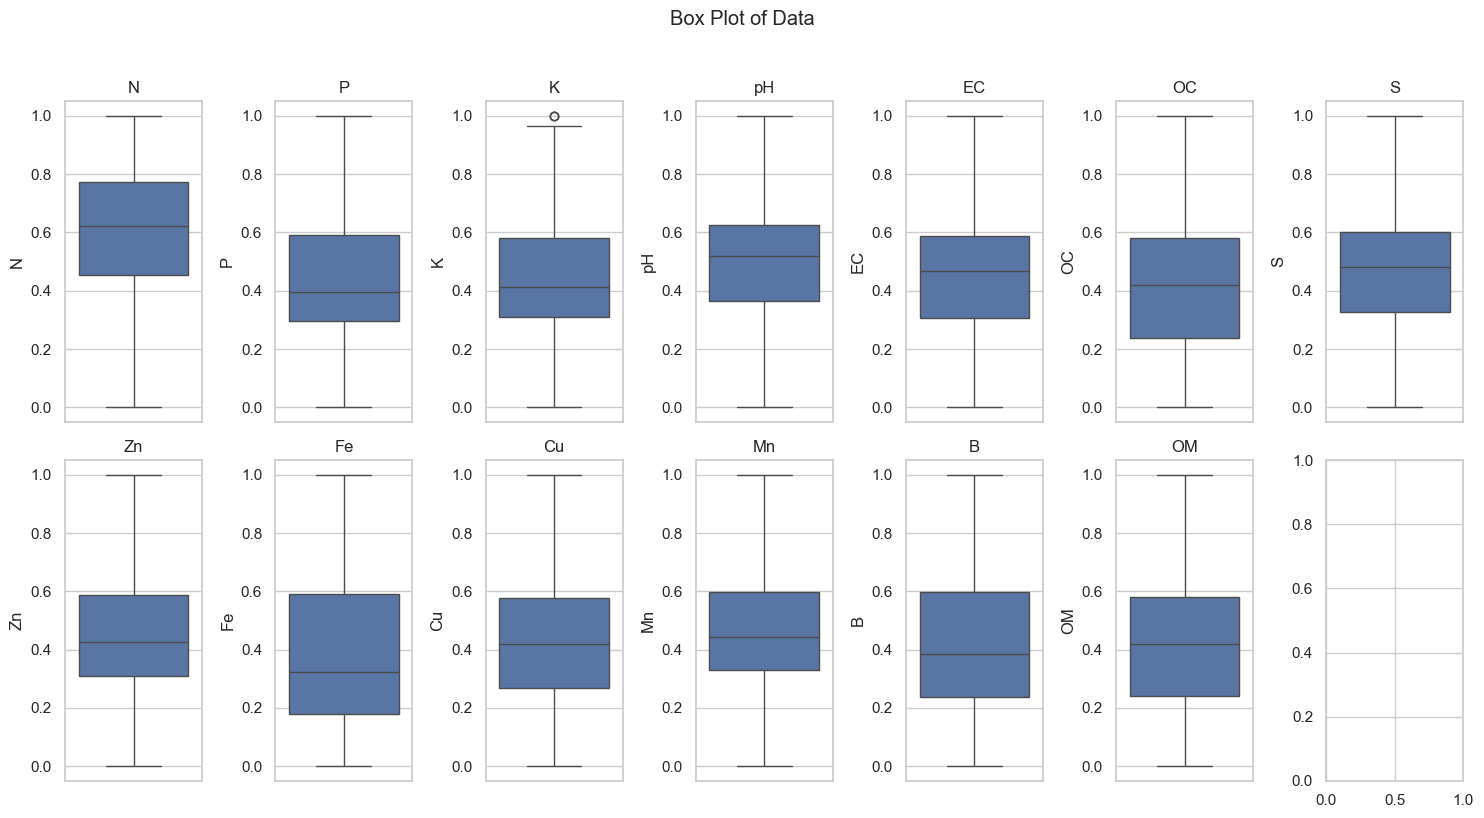

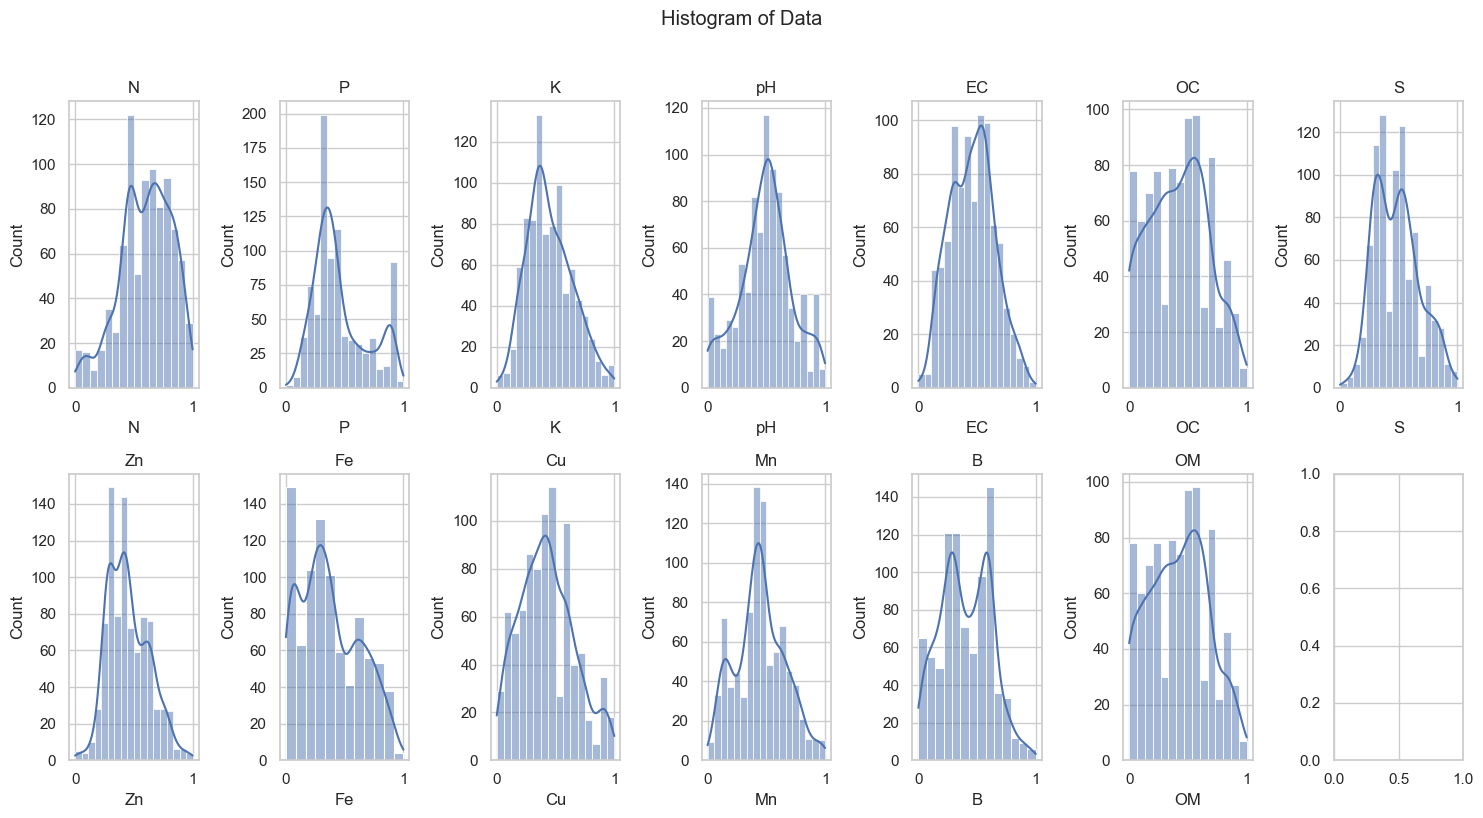

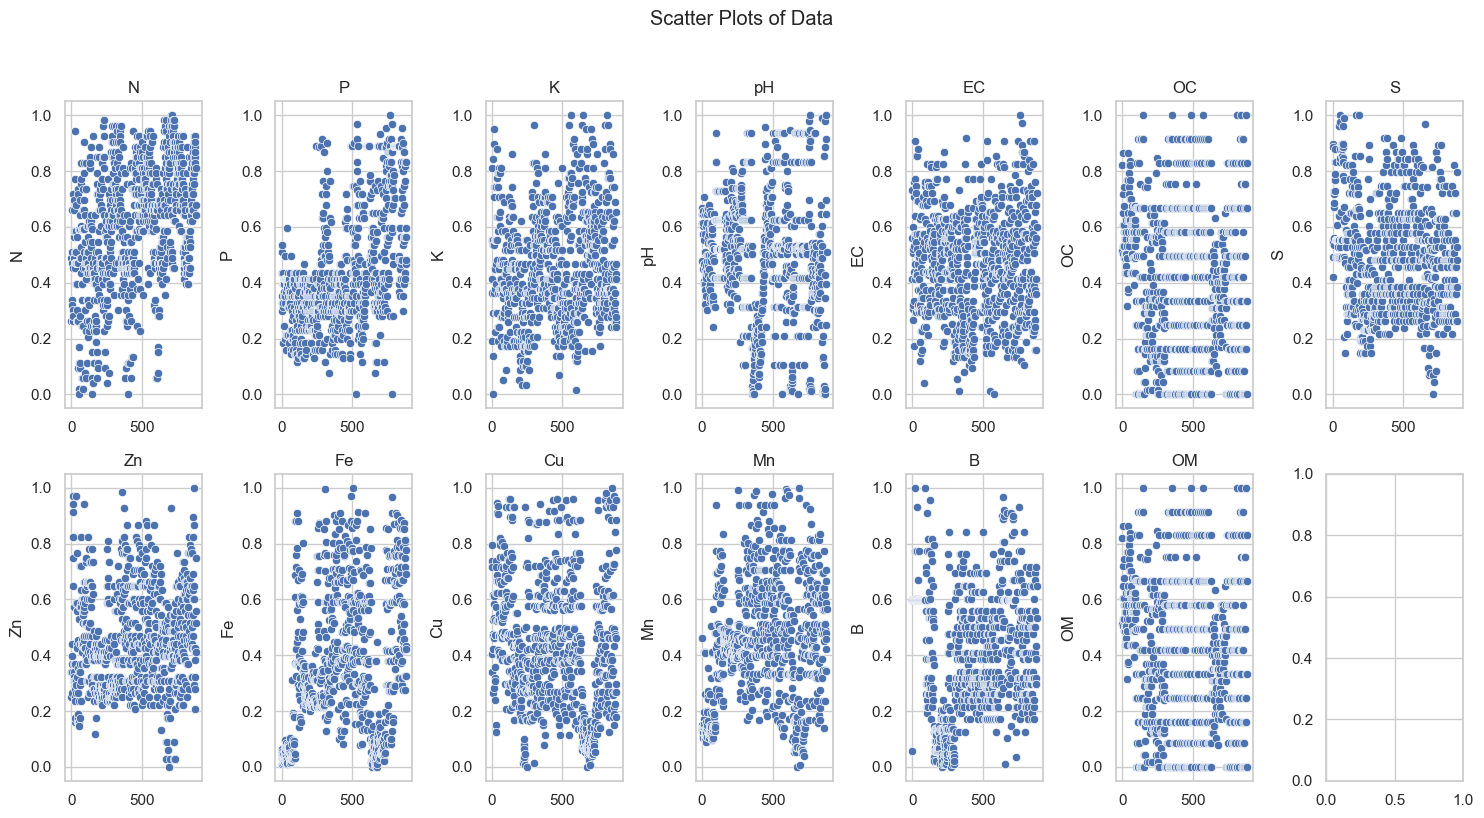

In [5]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(702, 13) (176, 13) (702,) (176,)


# 1. Kmeans

100%|██████████| 5/5 [00:14<00:00,  2.89s/it]


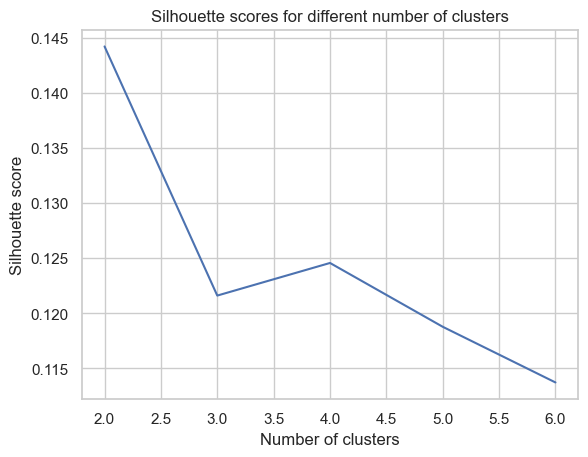

In [7]:
plot_silhouette_scores(X.to_numpy(), k_range=range(2, 7), strategy='euclidean')

- we can see that the best number of clusters is 3

In [8]:
kmeans = KMeans(num_clusters=3, max_iter=100)

In [9]:
kmeans.fit(X_train)
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2,
       1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0,

In [10]:
kmeans.predict(X_test)

array([0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0],
      dtype=int64)

C:\Users\chare\anaconda3\envs\data_mining\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


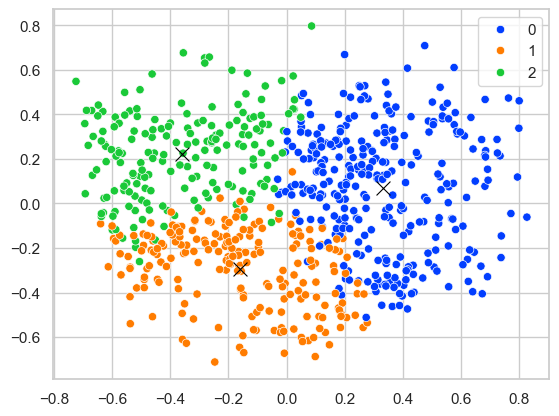

In [11]:
kmeans.plot(X_train)

In [12]:
models = []
for func in strategies:
    models.extend([KMeans(num_clusters=k, max_iter=150) for k in range(2, 7)])
models

[KMeans(num_clusters=2, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=2, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=2, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=5, d

In [13]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

In [14]:
evaluate(X_train, Y_train, X_test, Y_test, models, get_args(Metric), averages)

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KMeans(num_clusters=2, distance_metric=euclide...",0.494318,0.329285,0.494318,0.474576,0.342953,0.494318,0.494318,0.335978,0.494318,0.484243,0.675747,0.747159,0.532922
1,"KMeans(num_clusters=3, distance_metric=euclide...",0.318182,0.351558,0.318182,0.499874,0.264300,0.318182,0.318182,0.274794,0.318182,0.384609,0.677645,0.659091,0.714753
2,"KMeans(num_clusters=4, distance_metric=euclide...",0.312500,0.363717,0.374150,0.514394,0.260704,0.312500,0.312500,0.279260,0.340557,0.385562,0.740036,0.738636,0.742835
3,"KMeans(num_clusters=5, distance_metric=euclide...",0.284091,0.395152,0.467290,0.568347,0.198281,0.284091,0.284091,0.261241,0.353357,0.374754,0.832591,0.838068,0.821637
4,"KMeans(num_clusters=6, distance_metric=euclide...",0.119318,0.240430,0.265823,0.285484,0.213185,0.119318,0.119318,0.174128,0.164706,0.157797,0.818738,0.835227,0.785761
5,"KMeans(num_clusters=2, distance_metric=euclide...",0.500000,0.333204,0.500000,0.480218,0.346969,0.500000,0.500000,0.339944,0.500000,0.489905,0.679450,0.750000,0.538351
6,"KMeans(num_clusters=3, distance_metric=euclide...",0.448864,0.388408,0.448864,0.535800,0.399151,0.448864,0.448864,0.363530,0.448864,0.482838,0.704146,0.724432,0.663573
7,"KMeans(num_clusters=4, distance_metric=euclide...",0.244318,0.297943,0.292517,0.414306,0.256114,0.244318,0.244318,0.228284,0.266254,0.300512,0.705204,0.704545,0.706521
8,"KMeans(num_clusters=5, distance_metric=euclide...",0.170455,0.258270,0.272727,0.357974,0.163244,0.170455,0.170455,0.171274,0.209790,0.225333,0.771883,0.772727,0.770195
9,"KMeans(num_clusters=6, distance_metric=euclide...",0.215909,0.511111,0.487179,0.735606,0.149528,0.215909,0.215909,0.229997,0.299213,0.331859,0.900807,0.886364,0.929693
